## **Import libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [2]:
pip install gdown tensorflow

In [5]:
import gdown

# Define the Google Drive file ID and the output directory
file_id = '1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P'
output_file = 'dataset.zip'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

#unzipping the downloaded file
!unzip dataset.zip -d dataset

Downloading...
From: https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
To: /content/dataset.zip
100%|██████████| 65.7M/65.7M [00:00<00:00, 101MB/s]


Archive:  dataset.zip
   creating: dataset/no/
  inflating: dataset/no/no0.jpg      
  inflating: dataset/no/no1.jpg      
  inflating: dataset/no/no10.jpg     
  inflating: dataset/no/no100.jpg    
  inflating: dataset/no/no1000.jpg   
  inflating: dataset/no/no1001.jpg   
  inflating: dataset/no/no1002.jpg   
  inflating: dataset/no/no1003.jpg   
  inflating: dataset/no/no1004.jpg   
  inflating: dataset/no/no1005.jpg   
  inflating: dataset/no/no1006.jpg   
  inflating: dataset/no/no1007.jpg   
  inflating: dataset/no/no1008.jpg   
  inflating: dataset/no/no1009.jpg   
  inflating: dataset/no/no101.jpg    
  inflating: dataset/no/no1010.jpg   
  inflating: dataset/no/no1011.jpg   
  inflating: dataset/no/no1012.jpg   
  inflating: dataset/no/no1013.jpg   
  inflating: dataset/no/no1014.jpg   
  inflating: dataset/no/no1015.jpg   
  inflating: dataset/no/no1016.jpg   
  inflating: dataset/no/no1017.jpg   
  inflating: dataset/no/no1018.jpg   
  inflating: dataset/no/no1019.jpg   
  i

## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [18]:
(training_data, original_validation_data) = tf.keras.utils.image_dataset_from_directory(
    '/content/dataset',
    labels='inferred',
    label_mode='int', # Labels are represented as integers
    class_names=['no', 'yes'],
    color_mode='grayscale',
    batch_size=64,
    image_size=(256, 256),
    validation_split=0.2,
    subset='both', # Use both training and validation subsets
    seed=20
  )

#split the original validation data to two parts(for validation and test)
validation_size = int(0.2 * len(original_validation_data))
test_data = original_validation_data.take(validation_size)
validation_data = original_validation_data.skip(validation_size)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Using 600 files for validation.


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with.

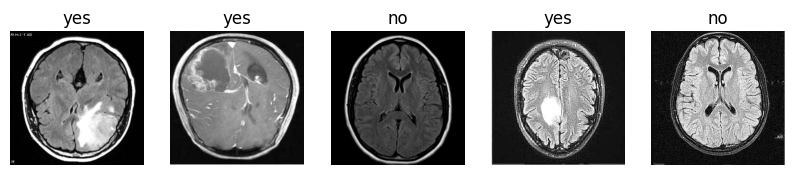

In [19]:
num_samples = 5
class_names = ['no', 'yes']  # Class names used in the dataset

# Iterate through the training dataset to extract a few samples
for images, labels in training_data.take(1):  # 1 batch
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        ax = plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')  # Display grayscale images
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()


## **Build the models**

In this section you will build the model with two approaches.
First you should build it with the Sequential API and then you have to work with the Functional API in the second part.

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## **1.Sequential API**

### **Build a model**

In [20]:
seq_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification ('yes' or 'no')
])

# Compile the model
seq_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### **Train the model**

In [21]:
history = seq_model.fit(training_data, epochs=5, validation_data=validation_data)

Epoch 1/5
38/38 [==============================] - 7s 110ms/step - loss: 346.7252 - accuracy: 0.6958 - val_loss: 33.1542 - val_accuracy: 0.8051
Epoch 2/5
38/38 [==============================] - 4s 95ms/step - loss: 12.0633 - accuracy: 0.8742 - val_loss: 8.7120 - val_accuracy: 0.8729
Epoch 3/5
38/38 [==============================] - 4s 92ms/step - loss: 1.6999 - accuracy: 0.9567 - val_loss: 2.9055 - val_accuracy: 0.9470
Epoch 4/5
38/38 [==============================] - 3s 74ms/step - loss: 0.5304 - accuracy: 0.9825 - val_loss: 2.6210 - val_accuracy: 0.9492
Epoch 5/5
38/38 [==============================] - 3s 75ms/step - loss: 0.4067 - accuracy: 0.9817 - val_loss: 1.7957 - val_accuracy: 0.9534


### **Test the model**

In [22]:
test_loss, test_accuracy = seq_model.evaluate(test_data)

2/2 [==============================] - 0s 67ms/step - loss: 2.7872 - accuracy: 0.9531


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

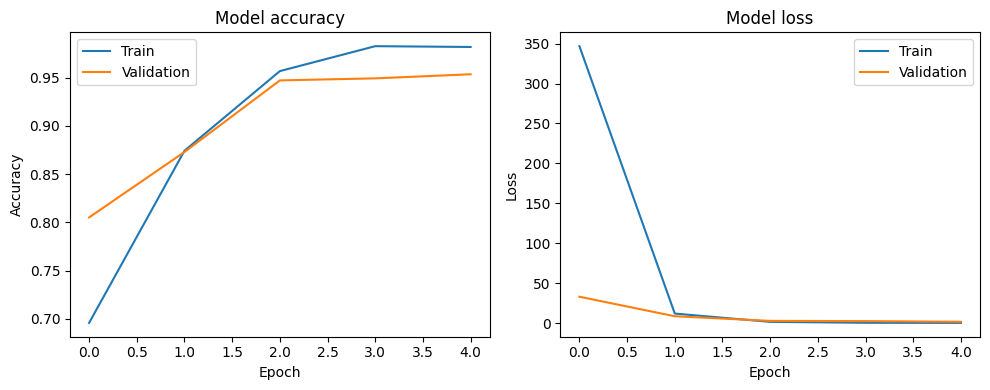

Test Accuracy: 95.31%
Test Loss: 2.7872


In [23]:
plt.figure(figsize=(10, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

## **2.Functional API**

### **Build a model**

In [24]:
input_shape = (256, 256, 1)
input_layer = Input(shape=input_shape)

x = Conv2D(16, (3, 3), activation='relu')(input_layer)
x = MaxPool2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)  # Assuming binary classification ('yes' or 'no')

func_model = Model(inputs=input_layer, outputs=output_layer)

func_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### **Train the model**

In [26]:
history = func_model.fit(training_data, epochs=5, validation_data=validation_data)

Epoch 1/5
38/38 [==============================] - 8s 91ms/step - loss: 104.4830 - accuracy: 0.7325 - val_loss: 28.4824 - val_accuracy: 0.7818
Epoch 2/5
38/38 [==============================] - 3s 72ms/step - loss: 5.4075 - accuracy: 0.9075 - val_loss: 3.5031 - val_accuracy: 0.9364
Epoch 3/5
38/38 [==============================] - 5s 110ms/step - loss: 0.7278 - accuracy: 0.9729 - val_loss: 1.8890 - val_accuracy: 0.9597
Epoch 4/5
38/38 [==============================] - 4s 75ms/step - loss: 0.3570 - accuracy: 0.9875 - val_loss: 1.7507 - val_accuracy: 0.9470
Epoch 5/5
38/38 [==============================] - 4s 85ms/step - loss: 0.5698 - accuracy: 0.9729 - val_loss: 3.3692 - val_accuracy: 0.9174


### **Test the model**

In [27]:
test_loss, test_accuracy = func_model.evaluate(test_data)

2/2 [==============================] - 0s 123ms/step - loss: 4.1135 - accuracy: 0.9062


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

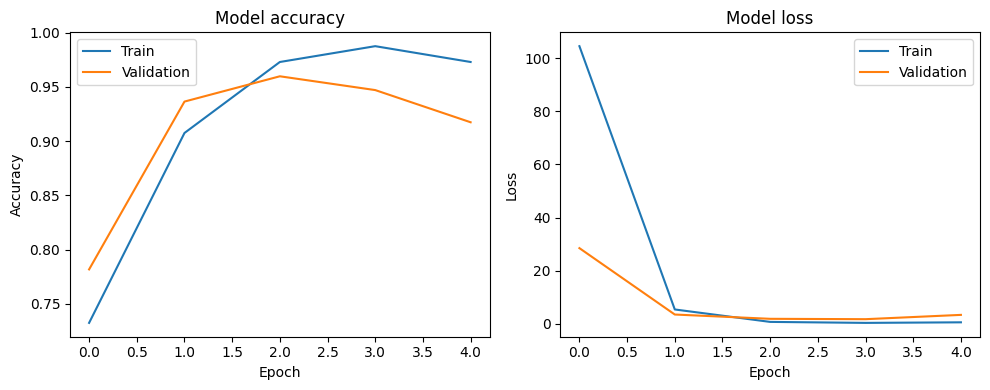

Test Accuracy: 90.62%
Test Loss: 4.1135


In [28]:
plt.figure(figsize=(10, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")